In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Research/Features CSV/features_replayed.csv')
df.head(5)

,feature_class,zero_crossing_rate - 0 - row,chroma_stft - 0 - row,chroma_stft - 1 - row,chroma_stft - 2 - row,chroma_stft - 3 - row,chroma_stft - 4 - row,chroma_stft - 5 - row,chroma_stft - 6 - row,chroma_stft - 7 - row,...,spectral_bandwidth - 0 - cd1,spectral_contrast - 0 - cd1,spectral_contrast - 1 - cd1,spectral_contrast - 2 - cd1,spectral_contrast - 3 - cd1,spectral_contrast - 4 - cd1,spectral_contrast - 5 - cd1,spectral_rolloff - 0 - cd1,poly_features - 0 - cd1,poly_features - 1 - cd1
0,1,0.073333,0.726748,0.759688,0.829605,0.903506,0.916470,0.856820,0.765329,1.0,...,48.754196,0.005552,0.021756,0.089071,0.327534,3.404054,22.397763,194.0,0.035404,160.070370
1,1,0.165000,0.212508,0.158332,0.081509,0.276560,0.147061,0.138793,0.518180,1.0,...,56.467501,19.312195,7.529678,14.475446,15.573279,14.426158,14.753686,256.0,0.069783,1.664959
2,1,0.148333,0.221604,0.485101,0.167458,0.164614,0.114240,0.222047,0.575339,1.0,...,53.943855,27.599710,9.017792,12.211384,12.255502,12.257732,11.903672,250.0,0.105755,6.395643
3,1,0.160000,0.146665,0.372613,0.196976,0.087564,0.059823,0.195238,0.455048,1.0,...,55.142265,26.061439,10.779738,13.136673,14.597047,14.974011,14.356653,252.0,0.054339,2.011222
4,1,0.193333,0.098455,0.146665,0.151385,0.130592,0.092747,0.141075,0.431040,1.0,...,57.398110,18.782844,14.695778,22.033995,10.413327,11.893577,14.741213,265.0,0.062495,0.859258


**Check Missing Values**

In [61]:
# checking for missing values
df.isna().sum()

feature_class                   0
zero_crossing_rate - 0 - row    0
chroma_stft - 0 - row           0
chroma_stft - 1 - row           0
chroma_stft - 2 - row           0
                               ..
spectral_contrast - 4 - cd1     0
spectral_contrast - 5 - cd1     0
spectral_rolloff - 0 - cd1      0
poly_features - 0 - cd1         0
poly_features - 1 - cd1         0
Length: 673, dtype: int64

In [62]:
X = df.drop(['feature_class'], axis=1)
y = df['feature_class']

In [63]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [66]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [67]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 2.62 s, sys: 12.8 ms, total: 2.64 s
Wall time: 1.54 s


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [68]:
# checking the oob score
classifier_rf.oob_score_

0.9468085106382979

In [69]:
y_pred = classifier_rf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9553191489361702

In [70]:
# classifing the features according to their importance
feature_imp = pd.Series(classifier_rf.feature_importances_,index=[i for i in range(672)]).sort_values(ascending=False)

# printing
print(feature_imp)

370    0.029326
452    0.023295
240    0.023072
658    0.020148
284    0.019464
         ...   
581    0.000000
263    0.000000
264    0.000000
77     0.000000
555    0.000000
Length: 672, dtype: float64


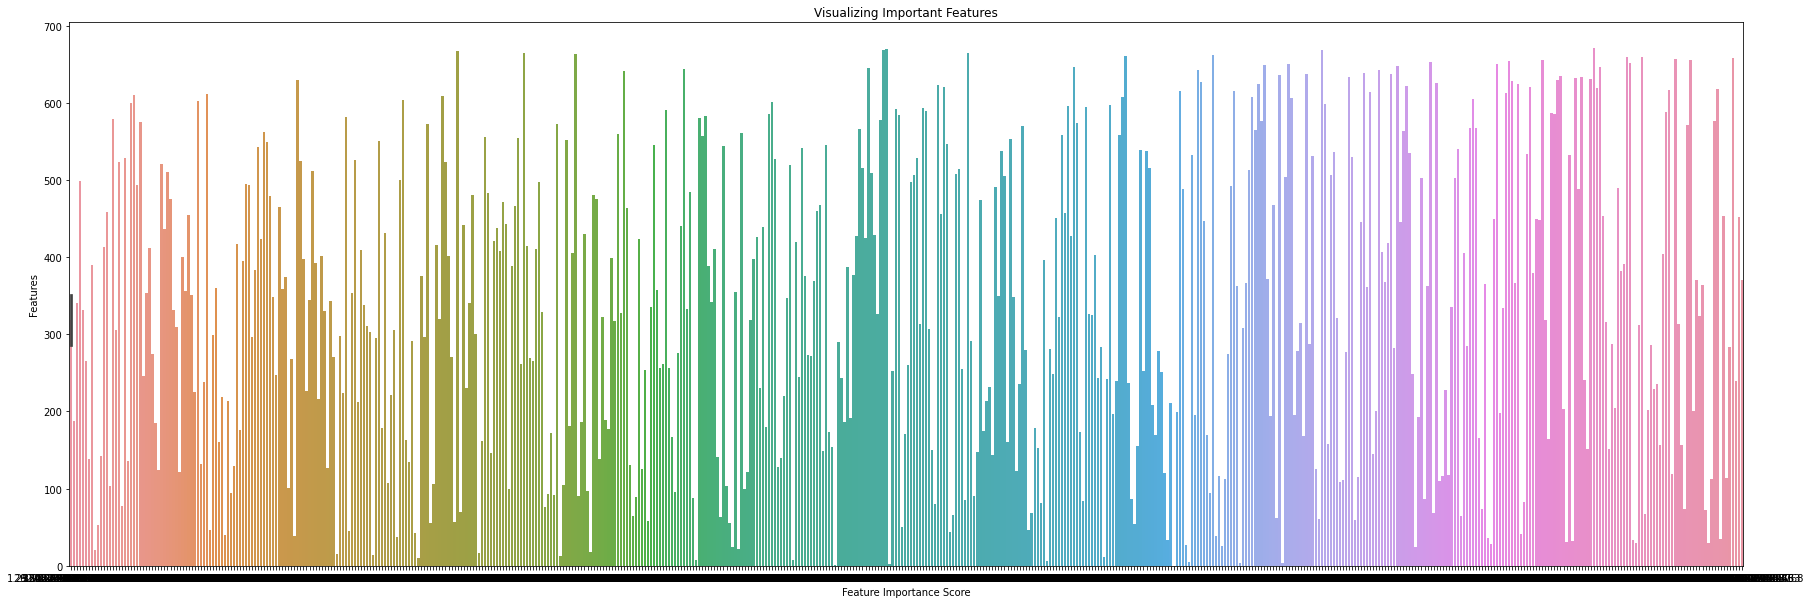

In [71]:
# graph size
plt.figure(figsize=(30,10))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()



---

**Model evaluation using confusion matrix**

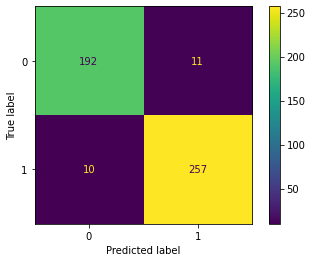

In [72]:
# importing the required modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifier_rf.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_rf.classes_)
disp.plot()

# showing the matrix
plt.show()

**Classification report**

In [73]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       203
           1       0.96      0.96      0.96       267

    accuracy                           0.96       470
   macro avg       0.95      0.95      0.95       470
weighted avg       0.96      0.96      0.96       470





---

**Hyperparameter tuning for Random Forest using GridSearchCV**

In [74]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [75]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [78]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 10.1 s, sys: 509 ms, total: 10.6 s
Wall time: 6min 45s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [79]:
grid_search.best_score_

0.9680851063829787

In [80]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

**Train model with best set of parameters**

In [81]:
classifier_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42, oob_score=True)

In [82]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 1.76 s, sys: 10.3 ms, total: 1.77 s
Wall time: 1.04 s


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, oob_score=True, random_state=42)

In [83]:
# checking the oob score
classifier_rf.oob_score_

0.9643617021276596

In [84]:
y_pred = classifier_rf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9702127659574468



---

**Model evaluation using confusion matrix**

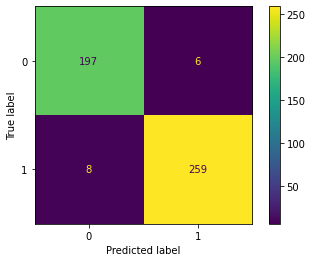

In [85]:
# importing the required modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifier_rf.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier_rf.classes_)
disp.plot()

# showing the matrix
plt.show()